* all_688 stores the original released data inside each folder
* aff_neurons stores the affine result inside each brain folder's affine folder
* aff_600 stores all the affine result in the aff_neurons to the single folder

In [1]:
import pandas as pd
import os
brain_regis = pd.read_excel(os.path.join('/home/penglab/Documents/result', 'brain_registration.xlsx'), index_col=[0], skiprows=[0],
                            names=['ID', 'y_initial', 'x_initial', 'z_initial', 'y_after', 'x_after', 'z_after',
                                   'ration', 'flip', 'flip_axis'])
brain_regis.loc[:, 'x_downsample'] = brain_regis.loc[:, 'x_initial'] / brain_regis.loc[:, 'x_after']
brain_regis.loc[:, 'y_downsample'] = brain_regis.loc[:, 'y_initial'] / brain_regis.loc[:, 'y_after']
brain_regis.loc[:, 'z_downsample'] = brain_regis.loc[:, 'z_initial'] / brain_regis.loc[:, 'z_after']
brain_regis.drop_duplicates(keep='first', inplace=True)
brain_regis.fillna(value='NA', inplace=True)
brain_regis = brain_regis.loc[~brain_regis.index.duplicated(keep='first')]
brain_regis.loc[:, 'x_initial'] = brain_regis.loc[:, 'x_initial'].astype(float)
brain_regis.loc[:, 'y_initial'] = brain_regis.loc[:, 'y_initial'].astype(float)
brain_regis.loc[:, 'z_initial'] = brain_regis.loc[:, 'z_initial'].astype(float)

In [2]:
brain_regis

,y_initial,x_initial,z_initial,y_after,x_after,z_after,ration,flip,flip_axis,x_downsample,y_downsample,z_downsample
ID,,,,,,,,,,,,
17109,35000.0,22793.0,10533.0,547,356,659,xy64z16,否,NA,64.0253,63.9854,15.9833
17302,54600.0,34412.0,9847.0,853,537,615,xy64z16,否,NA,64.0819,64.0094,16.0114
17541,54600.0,39328.0,11073.0,426,307,346,xy128z32,否,NA,128.104,128.169,32.0029
17542,54600.0,34748.0,11333.0,426,271,354,x128.221y128z32,否,NA,128.221,128.169,32.0141
17545,54600.0,35989.0,10750.0,853,562,671,xy64z16,否,NA,64.0374,64.0094,16.0209
17781,54600.0,34722.0,11021.0,426,271,344,x128.125y128.17z32,否,NA,128.125,128.169,32.0378
17782,28000.0,45000.0,11786.0,437,703,736,xy64z16,是,Y,64.0114,64.0732,16.0136
17787,24275.0,36400.0,11478.0,189,284,358,x128.17y128.44z32,否,NA,128.169,128.439,32.0615
17788,27188.0,35000.0,11120.0,212,273,347,128.205y128.245z32,是,Y,128.205,128.245,32.0461


### Check the resulted affinement neurons generated by me

In [15]:
import os
aff_folder = '/home/penglab/Documents/result/resulk'
aff_Problem = []
problem_brain = []
for i_brain in os.listdir(aff_folder):
    
    if int(i_brain) not in brain_regis.index.tolist():
        print('\nSkip '+str(i_brain))
        continue
    print('\n--------- Process brain '+str(i_brain))
    print('------------- '+str(len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))))+' neurons in total')
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    error_c = 0
    
    for iter_swc in os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(os.path.join(aff_folder, i_brain),'affine'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        neuron_info
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            flag_E = True
            #print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            flag_E = True
            #print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_c = error_c +1
            problem_brain.append(i_brain)
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_c/len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))),2))+'% neurons have error')
    
problem_brain = list(set(problem_brain))


--------- Process brain 17302
------------- 93 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17545
------------- 87 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17781
------------- 4 neurons in total
------------- 0.0% neurons have error

Skip 18452

--------- Process brain 18454
------------- 85 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18457
------------- 110 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18458
------------- 43 neurons in total
------------- 0.0% neurons have error

Skip 18462

Skip 18463

--------- Process brain 18464
------------- 25 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18465
------------- 61 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18869
------------- 6 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17782
-------

In [9]:
problem_brain = list(set(problem_brain))
print(str(problem_brain)+' have problems')

['18455'] have problems


## Check problem_brain's resample result
* aff_neurons stores the affine result of SEU inside each brain folder's affine folder

In [10]:
path_temp = aff_folder 
error_r = 0
for i_brain in problem_brain:
    path_brain = os.path.join(path_temp,i_brain)
    # specific downsample size for the i_brain
    x_aff_bound = brain_regis.loc[int(i_brain), 'x_after']
    y_aff_bound = brain_regis.loc[int(i_brain), 'y_after']
    z_aff_bound = brain_regis.loc[int(i_brain), 'z_after']
    for iter_swc in os.listdir(os.path.join(path_brain, 'resample')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(path_brain, 'resample'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound))     
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_r = error_r +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_r/len(os.listdir(os.path.join(path_brain, 'resample'))),2))+'% neurons have exceeds the boundary in brain '+ str(i_brain))

------------- 0.0% neurons have exceeds the boundary in brain 18455


## Check problem_brain's affinemnt result
* aff_neurons stores the affine result of SEU inside each brain folder's affine folder

In [12]:
path_temp = aff_folder 
problemDF = pd.DataFrame()
error_r = 0
for i_brain in problem_brain:
    path_brain = os.path.join(path_temp,i_brain)
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    for iter_swc in os.listdir(os.path.join(path_brain, 'affine')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(path_brain, 'affine'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            problemDF.loc[neuron_info,'max_x'] = max(swc['x'])
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound)) 
            problemDF.loc[neuron_info,'max_y'] = max(swc['y'])
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            problemDF.loc[neuron_info,'max_z'] = max(swc['z'])
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if min(swc['x'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of x is '+ str(min(swc['x'])))
            problemDF.loc[neuron_info,'min_x'] = min(swc['x'])
            flag_E = True
        if min(swc['y'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of y is '+ str(min(swc['y'])))
            problemDF.loc[neuron_info,'min_y'] = min(swc['y'])
            flag_E = True
        if min(swc['z'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of z is '+ str(min(swc['z'])))
            problemDF.loc[neuron_info,'min_z'] = min(swc['z'])
            flag_E = True
        
        if flag_E:
            error_r = error_r +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_r/len(os.listdir(os.path.join(path_brain, 'affine'))),2))+'% neurons have exceeds the boundary in brain '+ str(i_brain))

	18455_00002
		Maximum value of x is 598.13, while the boundary is 568
		Minimum value of y is -82.902
	18455_00004
		Minimum value of y is -125.89
	18455_00008
		Maximum value of x is 574.413, while the boundary is 568
		Minimum value of y is -124.75200000000001
	18455_00009
		Maximum value of x is 617.72, while the boundary is 568
		Minimum value of y is -139.749
	18455_00012
		Minimum value of y is -134.469
	18455_00013
		Minimum value of y is -158.469
	18455_00014
		Minimum value of y is -84.13600000000001
	18455_00015
		Maximum value of x is 622.4, while the boundary is 568
		Minimum value of y is -14.562000000000001
	18455_00016
		Minimum value of y is -151.023
	18455_00017
		Maximum value of x is 728.253, while the boundary is 568
		Minimum value of y is -30.410999999999998
	18455_00018
		Maximum value of x is 816.579, while the boundary is 568
		Minimum value of y is -29.791
	18455_00019
		Maximum value of x is 603.499, while the boundary is 568
		Minimum value of y is -15.5840

	18455_00207
		Maximum value of x is 594.192, while the boundary is 568
		Maximum value of z is 790.9680000000001, while the boundary is 456
		Minimum value of y is -79.251
	18455_00208
		Maximum value of x is 586.056, while the boundary is 568
		Maximum value of z is 765.845, while the boundary is 456
		Minimum value of y is -83.149
	18455_00220
		Maximum value of z is 758.701, while the boundary is 456
		Minimum value of y is -225.197
	18455_00224
		Maximum value of z is 775.533, while the boundary is 456
		Minimum value of y is -155.5
	18455_00240
		Maximum value of x is 770.005, while the boundary is 568
		Maximum value of z is 769.623, while the boundary is 456
		Minimum value of y is -138.035
	18455_00252
		Maximum value of x is 620.357, while the boundary is 568
		Maximum value of z is 821.569, while the boundary is 456
		Minimum value of y is -56.076
	18455_00253
		Maximum value of x is 630.229, while the boundary is 568
		Maximum value of z is 823.377, while the boundary is 45

In [14]:
problemDF.fillna(value='Normal',inplace = True)
#problemDF.to_excel('/home/penglab/NMTcode/problemDF.xlsx')



### Below comparing the affine result between previous and now

In [24]:
import numpy as np
import shutil
## Move AHU's result to a single folder
input_pre = '/home/penglab/Documents/result/2_affine_swc'
output_pre = '/home/penglab/Documents/result/cp_aff'

folder = os.path.exists(os.path.join(output_pre,'pre'))
if not folder:  
    os.makedirs(os.path.join(output_pre,'pre'))
for i_brain in os.listdir(input_pre):
    for i_swc in os.listdir(os.path.join(input_pre,i_brain)):
        oldname = os.path.join(input_pre,i_brain)+ '/'+ str(i_swc)
        newname = os.path.join(output_cur,'pre') + '/'+ str(i_swc)
        shutil.copyfile(oldname,newname)

input_cur = '/home/penglab/Documents/result/resulk'
output_cur = '/home/penglab/Documents/result/cp_aff'
folder = os.path.exists(os.path.join(output_cur,'cur'))
if not folder:  
    os.makedirs(os.path.join(output_cur,'cur'))
for i_brain in os.listdir(input_cur):
    for i_folder in os.listdir(os.path.join(input_cur,i_brain)):
        if i_folder == 'affine':
            for i_swc in os.listdir(os.path.join(os.path.join(input_cur,i_brain),i_folder)):
                oldname = os.path.join(os.path.join(input_cur,i_brain),i_folder) + '/'+ str(i_swc)
                newname = os.path.join(output_cur,'cur') + '/'+ str(i_swc)
                shutil.copyfile(oldname,newname)
                
                
cur_path_aff = '/home/penglab/Documents/result/cp_aff/cur'
pre_path_aff = '/home/penglab/Documents/result/cp_aff/pre'
affDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
pre_L = []

for i_swc in os.listdir(pre_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    pre_L.append(neuronname)
for i_swc in os.listdir(cur_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in pre_L :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    #brain_L.append(brain_temp)
    affDF.loc[iter_i,"brain"] = brain_temp
    affDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(pre_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre_raff = os.path.join(pre_path_aff,i_swc_old)
    path_cur_raff = os.path.join(cur_path_aff,i_swc)
    n_skip = 0
    with open(path_pre_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF.shape[0])+' neurons to be compared in this table')

Processing neuron 17302_00001
Processing neuron 17302_00002
Processing neuron 17302_00003
Processing neuron 17302_00005
Processing neuron 17302_00006
Processing neuron 17302_00007
Processing neuron 17302_00009
Processing neuron 17302_00010
Processing neuron 17302_00011
Processing neuron 17302_00013
Processing neuron 17302_00014
Processing neuron 17302_00015
Processing neuron 17302_00016
Processing neuron 17302_00017
Processing neuron 17302_00018
Processing neuron 17302_00019
Processing neuron 17302_00020
Processing neuron 17302_00021
Processing neuron 17302_00023
Processing neuron 17302_00024
Processing neuron 17302_00025
Processing neuron 17302_00027
Processing neuron 17302_00030
Processing neuron 17302_00031
Processing neuron 17302_00032
Processing neuron 17302_00033
Processing neuron 17302_00034
Processing neuron 17302_00035
Processing neuron 17302_00036
Processing neuron 17302_00037
Processing neuron 17302_00038
Processing neuron 17302_00039
Processing neuron 17302_00040
Processing

Processing neuron 18457_00010
Processing neuron 18457_00012
Processing neuron 18457_00013
Processing neuron 18457_00014
Processing neuron 18457_00015
Processing neuron 18457_00017
Processing neuron 18457_00018
Processing neuron 18457_00019
Processing neuron 18457_00023
Processing neuron 18457_00025
Processing neuron 18457_00027
Processing neuron 18457_00028
Processing neuron 18457_00029
Processing neuron 18457_00030
Processing neuron 18457_00031
Processing neuron 18457_00032
Processing neuron 18457_00033
Processing neuron 18457_00034
Processing neuron 18457_00035
Processing neuron 18457_00036
Processing neuron 18457_00037
Processing neuron 18457_00038
Processing neuron 18457_00039
Processing neuron 18457_00040
Processing neuron 18457_00041
Processing neuron 18457_00043
Processing neuron 18457_00044
Processing neuron 18457_00045
Processing neuron 18457_00046
Processing neuron 18457_00047
Processing neuron 18457_00048
Processing neuron 18457_00049
Processing neuron 18457_00051
Processing

Processing neuron 18455_00126
Processing neuron 18455_00127
Processing neuron 18455_00133
Processing neuron 18455_00134
Processing neuron 18455_00135
Processing neuron 18455_00136
Processing neuron 18455_00137
Processing neuron 18455_00138
Processing neuron 18455_00139
Processing neuron 18455_00140
Processing neuron 18455_00141
Processing neuron 18455_00142
Processing neuron 18455_00144
Processing neuron 18455_00145
Processing neuron 18455_00146
Processing neuron 18455_00147
Processing neuron 18455_00148
Processing neuron 18455_00151
Processing neuron 18455_00154
Processing neuron 18455_00155
Processing neuron 18455_00157
Processing neuron 18455_00158
Processing neuron 18455_00159
Processing neuron 18455_00163
Processing neuron 18455_00166
Processing neuron 18455_00167
Processing neuron 18455_00182
Processing neuron 18455_00199
Processing neuron 18455_00200
Processing neuron 18455_00201
Processing neuron 18455_00202
Processing neuron 18455_00203
Processing neuron 18455_00206
Processing

In [28]:
import seaborn as sns
n_value = affDF.shape[0]
affDF.loc[:, 'brain'] = affDF.loc[:, 'brain'].astype(int)
affDF.loc[:,'idx'] = affDF.index.tolist()
affDF.loc[:, 'pre_x'] = affDF.loc[:, 'pre_x'].astype(float)
affDF.loc[:, 'pre_y'] = affDF.loc[:, 'pre_y'].astype(float)
affDF.loc[:, 'pre_z'] = affDF.loc[:, 'pre_z'].astype(float)
affDF.loc[:,'subx'] = affDF.loc[:,'pre_x'] - affDF.loc[:,'cur_x']
affDF.loc[:,'suby'] = affDF.loc[:,'pre_y'] - affDF.loc[:,'cur_y']
affDF.loc[:,'subz'] = affDF.loc[:,'pre_z'] - affDF.loc[:,'cur_z']
affDF.loc[:, 'subx'] = affDF.loc[:, 'subx'].astype(float)
affDF.loc[:, 'suby'] = affDF.loc[:, 'suby'].astype(float)
affDF.loc[:, 'subz'] = affDF.loc[:, 'subz'].astype(float)
affILL = pd.DataFrame(index = range(1,affDF.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL.loc[:, 'idx'] = np.tile(range(1,affDF.shape[0]+1), 3)
affILL.loc[:, 'axisV'] = affILL.loc[:, 'axisV'].astype(float)
affILL.loc[range(1,n_value+1), 'brain'] = affDF.loc[:,'brain'].tolist()
affILL.loc[range(1,n_value+1),'axisV']=affDF.loc[:,'subx'].tolist()
affILL.loc[range(1,n_value+1),'dim']='x'
affILL.loc[range(1,n_value+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[range(n_value+1,n_value*2+1), 'brain'] = affDF.loc[:,'brain'].tolist()
affILL.loc[range(n_value+1,n_value*2+1),'axisV']=affDF.loc[:,'suby'].tolist()
affILL.loc[range(n_value+1,n_value*2+1),'dim']='y'
affILL.loc[range(n_value+1,n_value*2+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[range(n_value*2+1,n_value*3+1), 'brain'] =affDF.loc[:,'brain'].tolist()
affILL.loc[range(n_value*2+1,n_value*3+1),'axisV']=affDF.loc[:,'subz'].tolist()
affILL.loc[range(n_value*2+1,n_value*3+1),'dim']='z'
affILL.loc[range(n_value*2+1,n_value*3+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[:, 'brain'] = affILL.loc[:, 'brain'].astype(int)

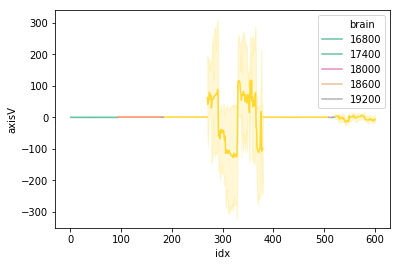

In [32]:
sns.lineplot(x='idx', y= 'axisV',hue='brain',data=affILL, palette="Set2")

In [35]:
set(affILL.loc[:, 'brain'])

{17302, 17545, 17781, 17782, 18454, 18455, 18457, 18458, 18464, 18465, 18869}

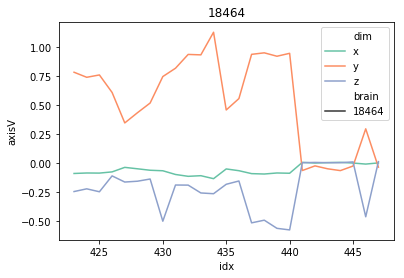

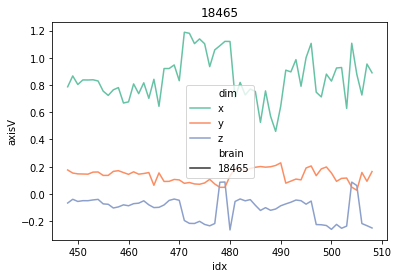

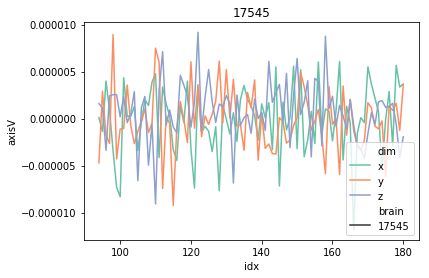

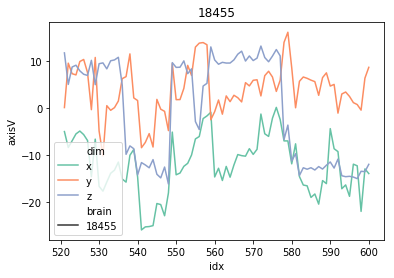

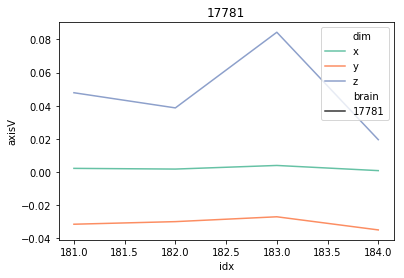

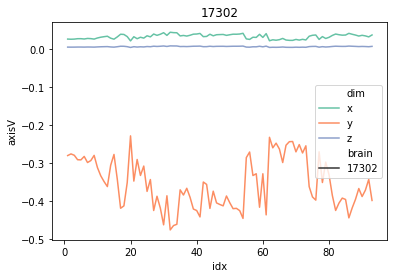

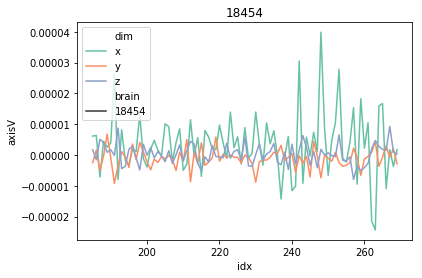

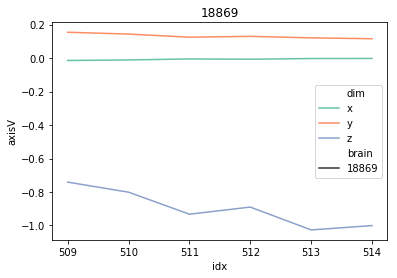

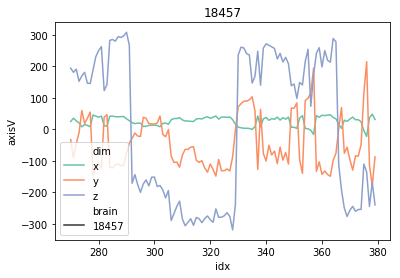

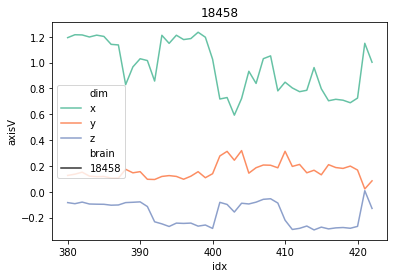

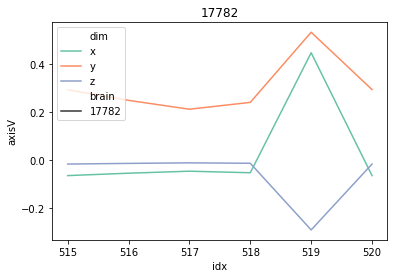

In [41]:
import matplotlib.pyplot as plt
for i in list(set(affILL.loc[:, 'brain'])):
    plt.figure()
    sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL[affILL['brain']==i], palette="Set2").set_title(i)
    plt.show()

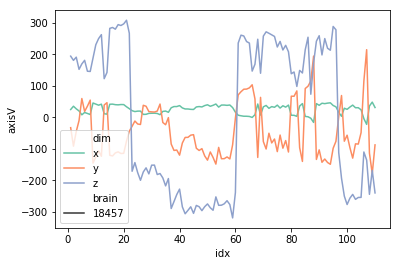

In [29]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL[affILL['brain']==18457], palette="Set2")

### Rerun the affine process, see SEU1 AND SEU2

In [30]:
import numpy as np
SEU1_path_aff = '/home/penglab/Documents/result/compare_aff2/SEU1'
SEU2_path_aff = '/home/penglab/Documents/result/compare_aff2/SEU2'
affDF2 = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
ahuaff_l = []
for i_swc in os.listdir(SEU2_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    ahuaff_l.append(neuronname)
for i_swc in os.listdir(SEU1_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in ahuaff_l :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    affDF2.loc[iter_i,"brain"] = brain_temp
    affDF2.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(SEU2_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_1_raff = os.path.join(SEU2_path_aff,i_swc_old)
    path_2_raff = os.path.join(SEU1_path_aff,i_swc)
    n_skip = 0
    with open(path_1_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_1_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF2.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF2.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF2.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_2_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_2_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF2.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF2.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF2.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF2.shape[0])+' neurons to be compared in this table')

Processing neuron 17782_00001
Processing neuron 17782_00002
Processing neuron 17782_00003
Processing neuron 17782_00004
Processing neuron 17782_00005
Processing neuron 17782_00006
Processing neuron 18457_00001
Processing neuron 18457_00002
Processing neuron 18457_00003
Processing neuron 18457_00004
Processing neuron 18457_00005
Processing neuron 18457_00006
Processing neuron 18457_00007
Processing neuron 18457_00008
Processing neuron 18457_00009
Processing neuron 18457_00010
Processing neuron 18457_00012
Processing neuron 18457_00013
Processing neuron 18457_00014
Processing neuron 18457_00015
Processing neuron 18457_00017
Processing neuron 18457_00018
Processing neuron 18457_00019
Processing neuron 18457_00023
Processing neuron 18457_00025
Processing neuron 18457_00027
Processing neuron 18457_00028
Processing neuron 18457_00029
Processing neuron 18457_00030
Processing neuron 18457_00031
Processing neuron 18457_00032
Processing neuron 18457_00033
Processing neuron 18457_00034
Processing

In [31]:
import seaborn as sns
affDF2.loc[:, 'brain'] = affDF2.loc[:, 'brain'].astype(int)
affDF2.loc[:,'idx'] = affDF2.index.tolist()
affDF2.loc[:, 'pre_x'] = affDF2.loc[:, 'pre_x'].astype(float)
affDF2.loc[:, 'pre_y'] = affDF2.loc[:, 'pre_y'].astype(float)
affDF2.loc[:, 'pre_z'] = affDF2.loc[:, 'pre_z'].astype(float)
affDF2.loc[:,'subx'] = affDF2.loc[:,'pre_x'] - affDF2.loc[:,'cur_x']
affDF2.loc[:,'suby'] = affDF2.loc[:,'pre_y'] - affDF2.loc[:,'cur_y']
affDF2.loc[:,'subz'] = affDF2.loc[:,'pre_z'] - affDF2.loc[:,'cur_z']
affDF2.loc[:, 'subx'] = affDF2.loc[:, 'subx'].astype(float)
affDF2.loc[:, 'suby'] = affDF2.loc[:, 'suby'].astype(float)
affDF2.loc[:, 'subz'] = affDF2.loc[:, 'subz'].astype(float)
affILL2 = pd.DataFrame(index = range(1,affDF2.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL2.loc[:, 'idx'] = np.tile(range(1,affDF2.shape[0]+1), 3)
affILL2.loc[:, 'axisV'] = affILL2.loc[:, 'axisV'].astype(float)
affILL2.loc[range(1,117), 'brain'] = affDF2.loc[:,'brain'].tolist()
affILL2.loc[range(1,117),'axisV']=affDF2.loc[:,'subx'].tolist()
affILL2.loc[range(1,117),'dim']='x'
affILL2.loc[range(1,117),'neuronID']=affDF2.loc[:, 'neuronID'].tolist()

affILL2.loc[range(117,116*2+1), 'brain'] = affDF2.loc[:,'brain'].tolist()
affILL2.loc[range(117,116*2+1),'axisV']=affDF2.loc[:,'suby'].tolist()
affILL2.loc[range(117,116*2+1),'dim']='y'
affILL2.loc[range(117,116*2+1),'neuronID']=affDF2.loc[:, 'neuronID'].tolist()

affILL2.loc[range(116*2+1,116*3+1), 'brain'] =affDF2.loc[:,'brain'].tolist()
affILL2.loc[range(116*2+1,116*3+1),'axisV']=affDF2.loc[:,'subz'].tolist()
affILL2.loc[range(116*2+1,116*3+1),'dim']='z'
affILL2.loc[range(116*2+1,116*3+1),'neuronID']=affDF2.loc[:, 'neuronID'].tolist()

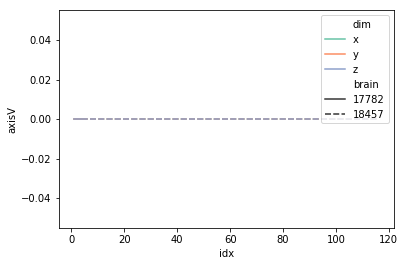

In [32]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL2, palette="Set2")

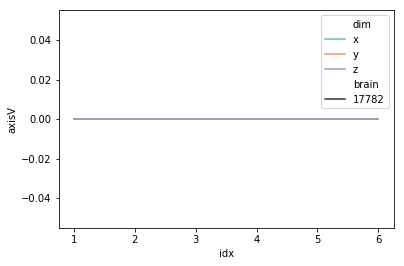

In [33]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL2[affILL2['brain']==17782], palette="Set2")

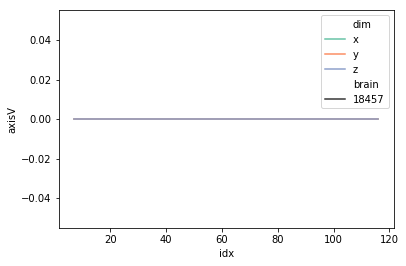

In [34]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL2[affILL2['brain']==18457], palette="Set2")

### ↑ Therefore, the affine result of the same resample files are stable
### Use AHU's resample result to run the affine steps, compared with SEU

In [35]:
import numpy as np
SEU1_path_aff = '/home/penglab/Documents/result/compare_aff3/SEU1'
AHU2_path_aff = '/home/penglab/Documents/result/compare_aff3/AHU2'
affDF3 = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
ahuaff_l = []
for i_swc in os.listdir(AHU2_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    ahuaff_l.append(neuronname)
for i_swc in os.listdir(SEU1_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in ahuaff_l :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    affDF3.loc[iter_i,"brain"] = brain_temp
    affDF3.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(AHU2_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_1_raff = os.path.join(AHU2_path_aff,i_swc_old)
    path_2_raff = os.path.join(SEU1_path_aff,i_swc)
    n_skip = 0
    with open(path_1_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_1_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF3.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF3.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF3.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_2_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_2_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF3.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF3.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF3.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF3.shape[0])+' neurons to be compared in this table')
import seaborn as sns
affDF3.loc[:, 'brain'] = affDF3.loc[:, 'brain'].astype(int)
affDF3.loc[:,'idx'] = affDF3.index.tolist()
affDF3.loc[:, 'pre_x'] = affDF3.loc[:, 'pre_x'].astype(float)
affDF3.loc[:, 'pre_y'] = affDF3.loc[:, 'pre_y'].astype(float)
affDF3.loc[:, 'pre_z'] = affDF3.loc[:, 'pre_z'].astype(float)
affDF3.loc[:,'subx'] = affDF3.loc[:,'pre_x'] - affDF3.loc[:,'cur_x']
affDF3.loc[:,'suby'] = affDF3.loc[:,'pre_y'] - affDF3.loc[:,'cur_y']
affDF3.loc[:,'subz'] = affDF3.loc[:,'pre_z'] - affDF3.loc[:,'cur_z']
affDF3.loc[:, 'subx'] = affDF3.loc[:, 'subx'].astype(float)
affDF3.loc[:, 'suby'] = affDF3.loc[:, 'suby'].astype(float)
affDF3.loc[:, 'subz'] = affDF3.loc[:, 'subz'].astype(float)
affILL3 = pd.DataFrame(index = range(1,affDF3.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL3.loc[:, 'idx'] = np.tile(range(1,affDF3.shape[0]+1), 3)
affILL3.loc[:, 'axisV'] = affILL3.loc[:, 'axisV'].astype(float)
affILL3.loc[range(1,117), 'brain'] = affDF3.loc[:,'brain'].tolist()
affILL3.loc[range(1,117),'axisV']=affDF3.loc[:,'subx'].tolist()
affILL3.loc[range(1,117),'dim']='x'
affILL3.loc[range(1,117),'neuronID']=affDF3.loc[:, 'neuronID'].tolist()

affILL3.loc[range(117,116*2+1), 'brain'] = affDF3.loc[:,'brain'].tolist()
affILL3.loc[range(117,116*2+1),'axisV']=affDF3.loc[:,'suby'].tolist()
affILL3.loc[range(117,116*2+1),'dim']='y'
affILL3.loc[range(117,116*2+1),'neuronID']=affDF3.loc[:, 'neuronID'].tolist()

affILL3.loc[range(116*2+1,116*3+1), 'brain'] =affDF3.loc[:,'brain'].tolist()
affILL3.loc[range(116*2+1,116*3+1),'axisV']=affDF3.loc[:,'subz'].tolist()
affILL3.loc[range(116*2+1,116*3+1),'dim']='z'
affILL3.loc[range(116*2+1,116*3+1),'neuronID']=affDF3.loc[:, 'neuronID'].tolist()

Processing neuron 18457_00062
Processing neuron 18457_00063
Processing neuron 18457_00066
Processing neuron 18457_00069
Processing neuron 18457_00072
Processing neuron 18457_00073
Processing neuron 18457_00074
Processing neuron 18457_00075
Processing neuron 18457_00076
Processing neuron 18457_00077
Processing neuron 18457_00078
Processing neuron 18457_00079
Processing neuron 18457_00080
Processing neuron 18457_00081
Processing neuron 18457_00082
Processing neuron 18457_00083
Processing neuron 18457_00087
Processing neuron 18457_00088
Processing neuron 18457_00089
Processing neuron 18457_00090
Processing neuron 18457_00091
Processing neuron 18457_00096
Processing neuron 18457_00097
Processing neuron 18457_00098
Processing neuron 18457_00099
Processing neuron 18457_00101
Processing neuron 18457_00102
Processing neuron 18457_00103
Processing neuron 18457_00106
Processing neuron 18457_00108
Processing neuron 18457_00110
Processing neuron 18457_00111
Processing neuron 18457_00113
Processing

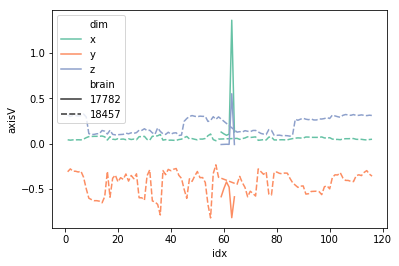

In [36]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL3, palette="Set2")

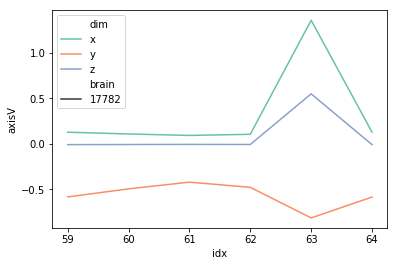

In [39]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL3[affILL3['brain']==17782], palette="Set2")

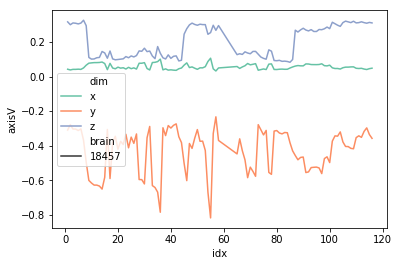

In [40]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL3[affILL3['brain']==18457], palette="Set2")


### Use AHU's resample result to run the affine steps, compared with previous one

In [42]:
import numpy as np
AHU1_path_aff = '/home/penglab/Documents/result/compare_aff3/AHU1'
AHU2_path_aff = '/home/penglab/Documents/result/compare_aff3/AHU2'
affDF4 = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
ahuaff_l = []
for i_swc in os.listdir(AHU2_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    ahuaff_l.append(neuronname)
for i_swc in os.listdir(AHU1_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in ahuaff_l :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    affDF4.loc[iter_i,"brain"] = brain_temp
    affDF4.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(AHU2_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_1_raff = os.path.join(AHU2_path_aff,i_swc_old)
    path_2_raff = os.path.join(AHU1_path_aff,i_swc)
    n_skip = 0
    with open(path_1_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_1_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF4.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF4.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF4.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_2_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_2_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF4.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF4.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF4.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF4.shape[0])+' neurons to be compared in this table')
import seaborn as sns
affDF4.loc[:, 'brain'] = affDF4.loc[:, 'brain'].astype(int)
affDF4.loc[:,'idx'] = affDF4.index.tolist()
affDF4.loc[:, 'pre_x'] = affDF4.loc[:, 'pre_x'].astype(float)
affDF4.loc[:, 'pre_y'] = affDF4.loc[:, 'pre_y'].astype(float)
affDF4.loc[:, 'pre_z'] = affDF4.loc[:, 'pre_z'].astype(float)
affDF4.loc[:,'subx'] = affDF4.loc[:,'pre_x'] - affDF4.loc[:,'cur_x']
affDF4.loc[:,'suby'] = affDF4.loc[:,'pre_y'] - affDF4.loc[:,'cur_y']
affDF4.loc[:,'subz'] = affDF4.loc[:,'pre_z'] - affDF4.loc[:,'cur_z']
affDF4.loc[:, 'subx'] = affDF4.loc[:, 'subx'].astype(float)
affDF4.loc[:, 'suby'] = affDF4.loc[:, 'suby'].astype(float)
affDF4.loc[:, 'subz'] = affDF4.loc[:, 'subz'].astype(float)
affILL4 = pd.DataFrame(index = range(1,affDF4.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL4.loc[:, 'idx'] = np.tile(range(1,affDF4.shape[0]+1), 3)
affILL4.loc[:, 'axisV'] = affILL4.loc[:, 'axisV'].astype(float)
affILL4.loc[range(1,117), 'brain'] = affDF4.loc[:,'brain'].tolist()
affILL4.loc[range(1,117),'axisV']=affDF4.loc[:,'subx'].tolist()
affILL4.loc[range(1,117),'dim']='x'
affILL4.loc[range(1,117),'neuronID']=affDF4.loc[:, 'neuronID'].tolist()

affILL4.loc[range(117,116*2+1), 'brain'] = affDF4.loc[:,'brain'].tolist()
affILL4.loc[range(117,116*2+1),'axisV']=affDF4.loc[:,'suby'].tolist()
affILL4.loc[range(117,116*2+1),'dim']='y'
affILL4.loc[range(117,116*2+1),'neuronID']=affDF4.loc[:, 'neuronID'].tolist()

affILL4.loc[range(116*2+1,116*3+1), 'brain'] =affDF4.loc[:,'brain'].tolist()
affILL4.loc[range(116*2+1,116*3+1),'axisV']=affDF4.loc[:,'subz'].tolist()
affILL4.loc[range(116*2+1,116*3+1),'dim']='z'
affILL4.loc[range(116*2+1,116*3+1),'neuronID']=affDF4.loc[:, 'neuronID'].tolist()

Processing neuron 18457_00037
Processing neuron 18457_00040
Processing neuron 18457_00039
Processing neuron 18457_00089
Processing neuron 18457_00101
Processing neuron 18457_00123
Processing neuron 18457_00115
Processing neuron 18457_00099
Processing neuron 18457_00063
Processing neuron 18457_00051
Processing neuron 18457_00017
Processing neuron 18457_00023
Processing neuron 18457_00007
Processing neuron 18457_00087
Processing neuron 18457_00064
Processing neuron 18457_00072
Processing neuron 18457_00098
Processing neuron 18457_00013
Processing neuron 18457_00144
Processing neuron 18457_00049
Processing neuron 18457_00111
Processing neuron 18457_00203
Processing neuron 18457_00057
Processing neuron 18457_00036
Processing neuron 18457_00046
Processing neuron 18457_00034
Processing neuron 18457_00170
Processing neuron 18457_00038
Processing neuron 18457_00061
Processing neuron 18457_00001
Processing neuron 18457_00108
Processing neuron 18457_00080
Processing neuron 18457_00129
Processing

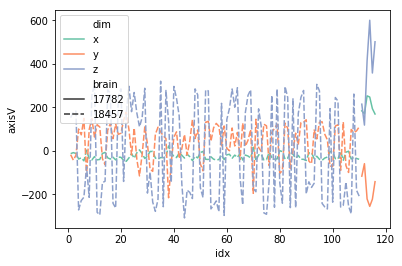

In [44]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL4, palette="Set2")

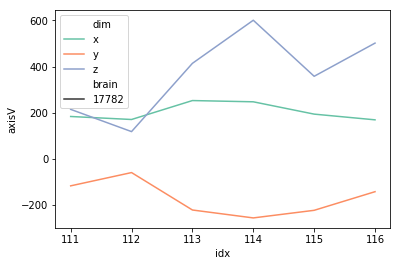

In [43]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL4[affILL4['brain']==17782], palette="Set2")

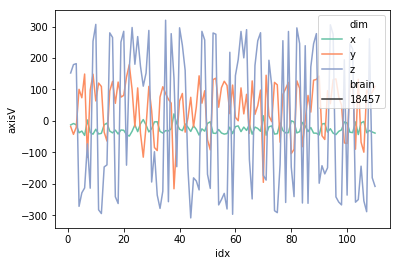

In [45]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL4[affILL4['brain']==18457], palette="Set2")